In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [3]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
# Merge datasets on CustomerID
data = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
data = data.merge(customers, on='CustomerID', how='left')

In [5]:
# Selecting relevant features for clustering
features = ['TotalValue', 'Quantity']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

In [6]:
# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

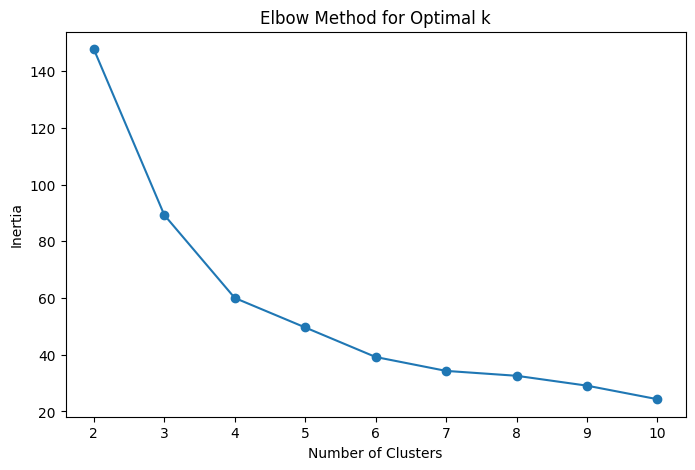

In [7]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
# Perform clustering with optimal k
optimal_k = 4  # Choose based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [9]:
# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(data_scaled, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.72127971818163


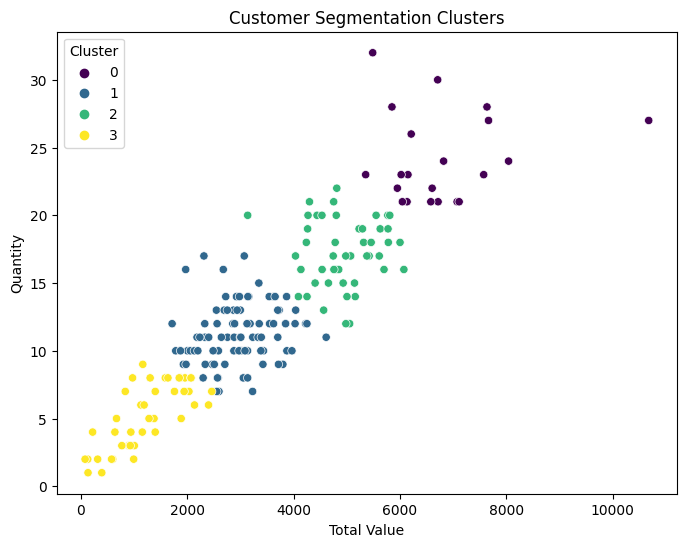

In [10]:
# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['TotalValue'], y=data['Quantity'], hue=data['Cluster'], palette='viridis')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.title('Customer Segmentation Clusters')
plt.legend(title='Cluster')
plt.show()

In [11]:
# Save the clustered data
data.to_csv('Customer_Segments.csv', index=False)
print("Customer segmentation completed. Results saved in Customer_Segments.csv")


Customer segmentation completed. Results saved in Customer_Segments.csv
